# Fractional Brownian Motion (fBm)

**Fractional Brownian Motion (fBm)** is a mathematical model used to describe a type of stochastic process that exhibits long-range dependence and self-similarity. It is an extension of standard Brownian Motion (BM), also known as a Wiener process. While standard Brownian Motion has a constant Hurst index of 0.5, fBm allows for a variable Hurst index (H), which governs its behavior.



In [18]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import gamma

In [25]:
def fractional_brownian_motion(T, H, S0, sigma):

    t = np.linspace(0, T, T+1)
    Z = np.random.normal(0, 1, size=T+1) 

    X = np.zeros(T+1)
    X[0] = S0
    for i in range(1,T+1):
        X[i] = X[i-1] + sigma*(gamma(H+0.5)/gamma(H-0.5))**(1/2) * (t[i]**H - (t[i-1])**H) * Z[i]

    df = pd.DataFrame({'Time': t, 'Price': X}) 
    
    return df

In [26]:
def plot_brownian_motion(df):
    # Plot results  
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(df['Time'], df['Price'], color='blue', label='Prices')
    ax.set_title(f"Fractional Brownian Motion - H={H}")
    ax.grid(True)

    # Display legend
    ax.legend()

    # Show the plot
    plt.show()

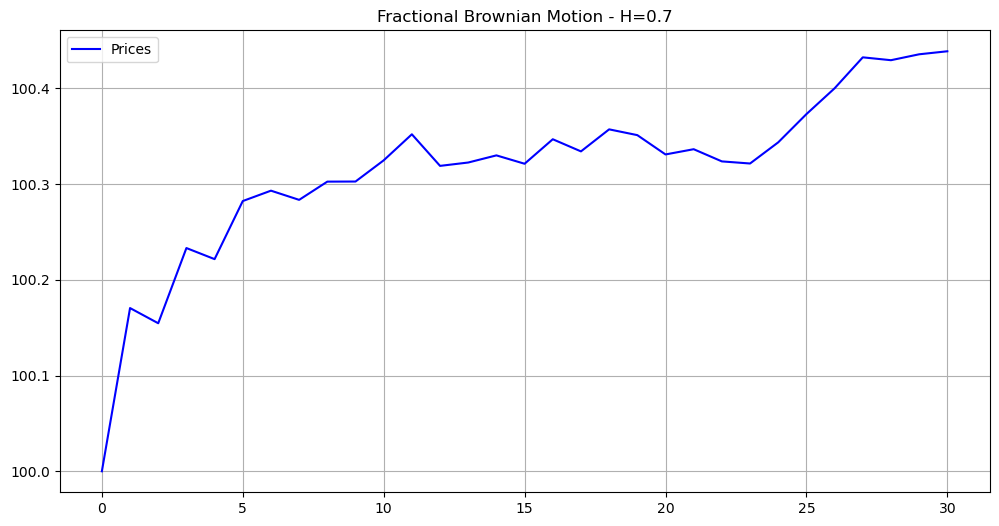

In [28]:
T = 30 # Total time steps
H = 0.7 # Hurst parameter
S0 = 100 # Initial price
sigma = 0.2  

fbm = fractional_brownian_motion(T, H, S0, sigma)
fbm.to_csv('fractional_brownian_motion.csv', index=False)
plot_brownian_motion(fbm)